
importation des bibliothèques nécessaires et chargement de fichier à analyser

In [1]:
import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
base='..\\data\\nettoyer\\Online_Retail_a_analyser.csv'
df_a_analyser= pd.read_csv(base,parse_dates=['InvoiceDate'])

creartion des colonne
- revenue :quantity*UnitPrice  dans la data_frame à analyser
-annee et mois a partir de Invoicedate 


In [2]:

df_a_analyser['Revenue']=df_a_analyser['UnitPrice']*df_a_analyser['Quantity']
df_a_analyser['mois']=df_a_analyser['InvoiceDate'].dt.month
df_a_analyser['anne']=df_a_analyser['InvoiceDate'].dt.year
df_a_analyser.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,mois,anne
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


calcule de revenue total par client

In [3]:
df_a_analyser.groupby('CustomerID')['Revenue'].sum()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Revenue, Length: 4339, dtype: float64

détermination de :nombre de transaction  nombre de client , nombre de produit:

In [4]:

print('Nombre de transactions :',df_a_analyser['InvoiceNo'].nunique())
print('Nombre de clients :', df_a_analyser['CustomerID'].nunique())
print('Nombre de produits :', df_a_analyser['StockCode'].nunique())

Nombre de transactions : 18536
Nombre de clients : 4339
Nombre de produits : 3665


détermination du top 10 de produit le plus vendu et création de fichier excel utilsable dans repports

Text(0.5, 1.0, 'Top 10 produits les plus vendus')

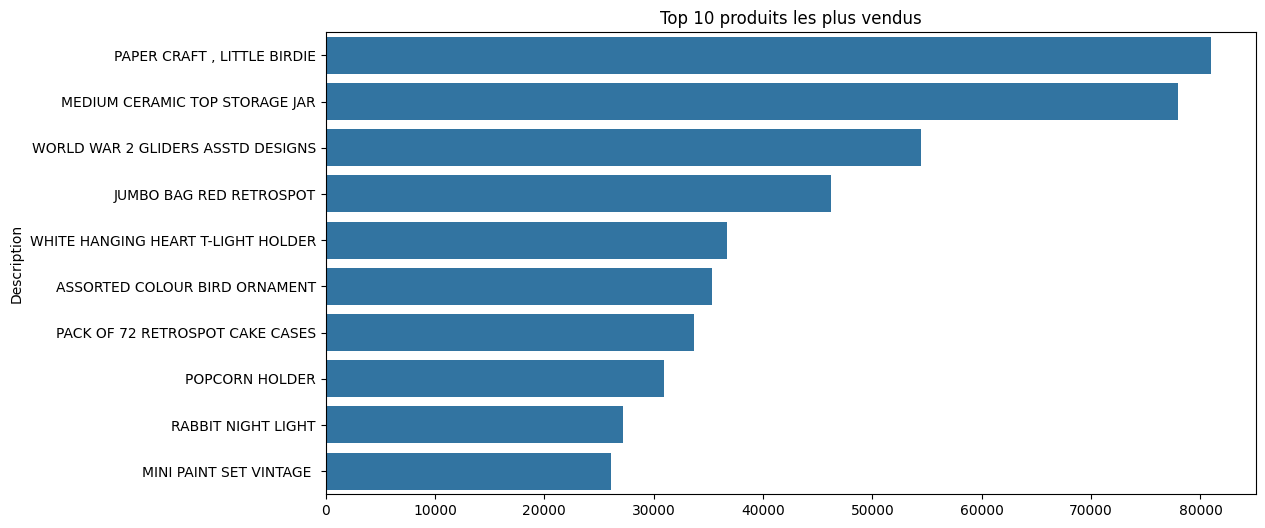

In [5]:
top_products = df_a_analyser.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.to_excel('..\\repports\\top10_produit.xlsx')
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 produits les plus vendus')

détermination de la top 10 de produit qui ont le plus de revenus et création de fichier excel utilisable dans repports

In [ ]:
top_revenue_products = df_a_analyser.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_revenue_products.to_excel('..\\repports\\top10_revenue_produit.xlsx')
plt.figure(figsize=(12,6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index)
plt.title("Top 10 produits par Revenue(CA)")

détermination de  la revenue par mois :


In [11]:
top_revenue_par_anne = df_a_analyser.groupby(['anne','mois'])['Revenue'].sum().sort_index(ascending=True)

df_revenu=top_revenue_par_anne.to_frame(name='revenue')
df_revenu['pourcentage']=(df_revenu['revenue']/df_revenu.groupby(level=0)['revenue'].transform('sum'))*100   #anne premier index(0)
df_revenu


revenue  pourcentage
anne mois                          
2010 12     572713.890   100.000000
2011 1      569445.040     6.828948
     2      447137.350     5.362199
     3      595500.760     7.141415
     4      469200.361     5.626785
     5      678594.560     8.137900
     6      661213.690     7.929463
     7      600091.011     7.196463
     8      645343.900     7.739148
     9      952838.382    11.426710
     10    1039318.790    12.463808
     11    1161817.380    13.932846
     12     518192.790     6.214316